# Exploring textbooks questions

## imports

In [1]:
%%capture
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
import math
from collections import Counter, defaultdict
%load_ext autoreload
%autoreload 2

In [2]:
%%capture
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pylab as plt
#%matplotlib notebook
%matplotlib inline
%load_ext base16_mplrc
%base16_mplrc light default
plt.rcParams['figure.figsize'] = (16.0, 10.0)

In [5]:
import pdfextraction.amt_boto_modules as amt

## Setting up paths and loading data

In [7]:
# data_pickled_dir = './store_hit_results_metadata/question_anno/group_latest_combined/' 
data_pickled_dir = './store_hit_results_metadata/group_latest_combined/' 

In [33]:
base_path = 'ai2-vision-turk-data/textbook-annotation-test/labeled-questions/'
test_path = 'ai2-vision-turk-data/textbook-annotation-test/hierarchy-ext-test/'

In [34]:
combined_results_df = pd.read_pickle(data_pickled_dir + 'complete_df.pkl')
combined_consensus_df = pd.read_pickle(data_pickled_dir + 'consensus_df.pkl')
# combined_consensus_with_workerid_df = pd.read_pickle(data_pickled_dir + 'consensus_df_w_workers.pkl') 

1) question type hist

2) what cats turkers do well on 

3) total questions 

In [11]:
# book_breakdowns, page_ranges = amt.load_book_info()

In [27]:
combined_consensus_df['category']

0         unlabeled
1      Figure Label
2         unlabeled
3      Figure Label
4      Figure Label
5          Question
6          Question
7          Question
8          Question
9          Question
10         Question
11        unlabeled
12        unlabeled
13        unlabeled
14        unlabeled
15     Header/Topic
16        unlabeled
17       Discussion
18        unlabeled
19        unlabeled
20        unlabeled
21        unlabeled
22        unlabeled
23         Question
24         Question
25        unlabeled
26        unlabeled
27        unlabeled
28        unlabeled
29        unlabeled
           ...     
411       unlabeled
412       unlabeled
413      Discussion
414       unlabeled
415      Definition
416       unlabeled
417        Question
418        Question
419        Question
420        Question
421        Question
422        Question
423        Question
424        Question
425        Question
426        Question
427       unlabeled
428        Question
429        Question


In [31]:
topic_df = combined_consensus_df [combined_consensus_df['category'] == 'Header/Topic']

In [32]:
def write_results_df(aggregate_results_df, anno_dir, local_result_dir='newly-labeled-annotations/'):
    local_result_path = base_path + local_result_dir
    for page, boxes in aggregate_results_df.groupby('page'):
        write_consensus_results(page, boxes, local_result_path, anno_dir

,page,box_id,category,hit_id
15,Daily_Science_Grade_3_(Daily_Practice_Books)_E...,T4,Header/Topic,3ZRKL6Z1E843IXDTRVRMMHH6KTQSGV
30,Daily_Science_Grade_3_(Daily_Practice_Books)_E...,T4,Header/Topic,3RKHNXPHGWXOZW1G6R71ZARNC7TKU7
45,Daily_Science_Grade_3_(Daily_Practice_Books)_E...,T4,Header/Topic,3JVP4ZJHDPTHDFZC8H85XNO34E0I0R
68,Daily_Science_Grade_3_(Daily_Practice_Books)_E...,T4,Header/Topic,324N5FAHSXCOCBQGBHH6VWT6QE2KVW
85,Daily_Science_Grade_3_(Daily_Practice_Books)_E...,T2,Header/Topic,3GITHABACYMGNQDHKKPBLJDZNBE2NB
90,Daily_Science_Grade_3_(Daily_Practice_Books)_E...,T4,Header/Topic,3GITHABACYMGNQDHKKPBLJDZNBE2NB
118,Daily_Science_Grade_3_(Daily_Practice_Books)_E...,T6,Header/Topic,3O2Y2UIUCQVZGE4QB2C2DAQK2KEFK3
139,Daily_Science_Grade_3_(Daily_Practice_Books)_E...,T4,Header/Topic,3TL87MO8CMQA0KM8W2O3SA3ZRKJFL6
176,Daily_Science_Grade_3_(Daily_Practice_Books)_E...,T6,Header/Topic,3GVPRXWRPHVVVQZWTGTEC2YQCS67IG
198,Daily_Science_Grade_3_(Daily_Practice_Books)_E...,T6,Header/Topic,3G9UA71JVVVRQ1J2BYEEO3DQP7V7JS


## category breakdown

In [15]:
combined_consensus_df['category'].value_counts()

Question        16986
unlabeled       16771
Discussion       5193
Answer           4867
Definition       3073
Header/Topic     1675
No Consensus     1490
Figure Label     1006
Name: category, dtype: int64

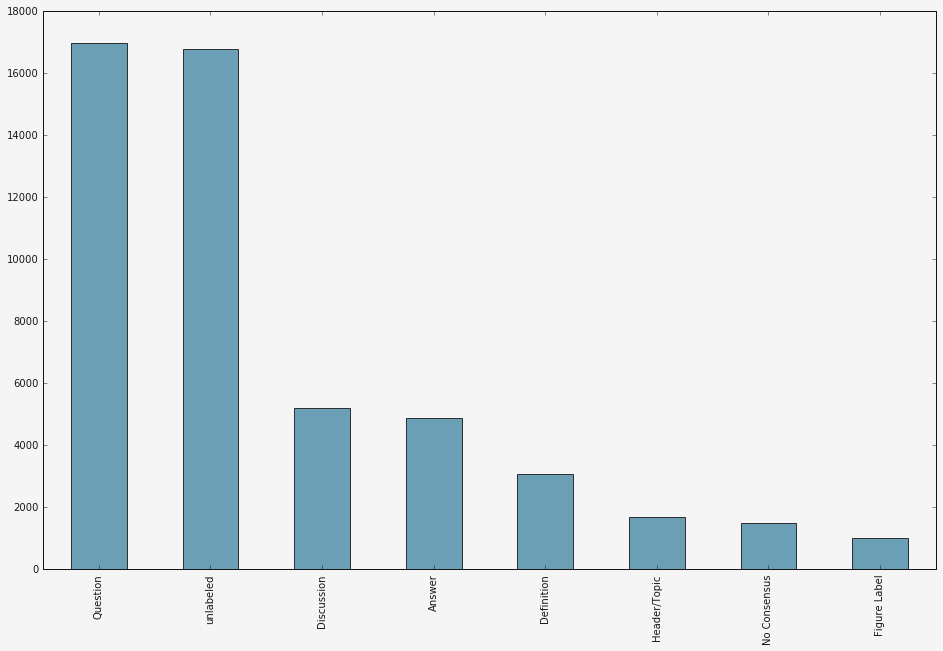

In [19]:
_ = combined_consensus_df['category'].value_counts().plot.bar()

### looking at raw box counts per page

In [22]:
only_cat_group = combined_consensus_df.groupby('category')['page'].apply(pd.value_counts)

In [23]:
only_cat_group.groupby(level=0).mean()

category
Answer          22.428571
Definition       3.924649
Discussion       4.484456
Figure Label     3.712177
Header/Topic     1.160776
No Consensus     3.679012
Question        12.704562
unlabeled        8.302475
Name: page, dtype: float64

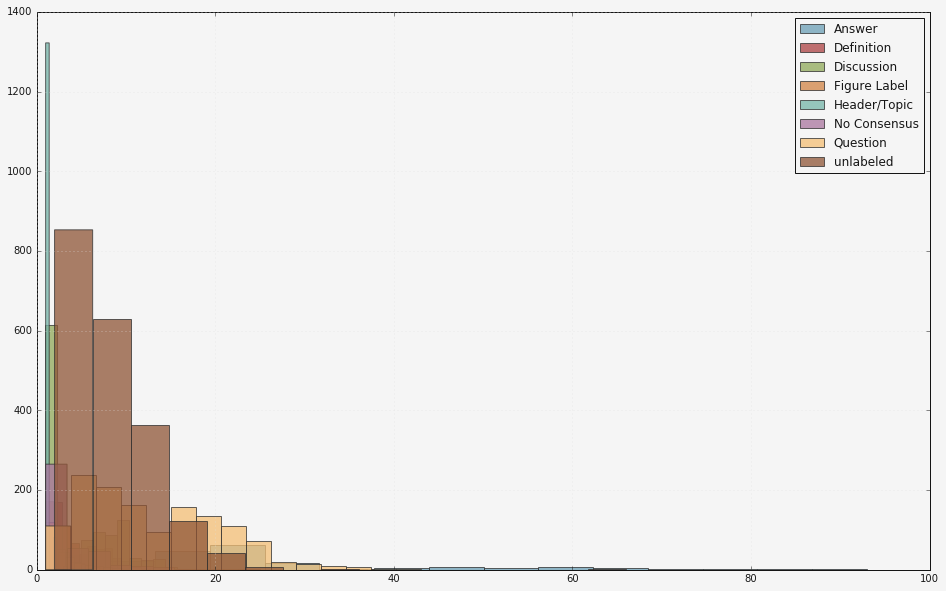

In [24]:
fig, ax = plt.subplots()
for g, counts in only_cat_group.groupby(level=0):
    _ = counts.hist(label=g, alpha=.75, ax=ax, bins = 15)
_ = ax.legend()

### looking at boxes per group by question type

In [46]:
diag_q = combined_consensus_df [combined_consensus_df['category'] == 'Figure Label']
has_fig_label_df = combined_consensus_df[combined_consensus_df['page'].isin(pd.unique(diag_q['page']))]

In [49]:
q_and_fig = has_fig_label_df [has_fig_label_df['category'] == 'Question']

In [51]:
pd.unique(q_and_fig['page']).shape

(237,)

In [52]:
pd.unique(q_and_fig['page'])

array(['Daily_Science_Grade_3_(Daily_Practice_Books)_Evan_Moore_143.jpeg',
       'Daily_Science_Grade_3_(Daily_Practice_Books)_Evan_Moore_161.jpeg',
       'Daily_Science_Grade_3_(Daily_Practice_Books)_Evan_Moore_166.jpeg',
       'Daily_Science_Grade_3_(Daily_Practice_Books)_Evan_Moore_168.jpeg',
       'Daily_Science_Grade_3_(Daily_Practice_Books)_Evan_Moore_169.jpeg',
       'Daily_Science_Grade_3_(Daily_Practice_Books)_Evan_Moore_175.jpeg',
       'Daily_Science_Grade_3_(Daily_Practice_Books)_Evan_Moore_179.jpeg',
       'Daily_Science_Grade_3_(Daily_Practice_Books)_Evan_Moore_181.jpeg',
       'Daily_Science_Grade_4_Evan_Moor_100.jpeg',
       'Daily_Science_Grade_4_Evan_Moor_102.jpeg',
       'Daily_Science_Grade_4_Evan_Moor_106.jpeg',
       'Daily_Science_Grade_4_Evan_Moor_108.jpeg',
       'Daily_Science_Grade_4_Evan_Moor_119.jpeg',
       'Daily_Science_Grade_4_Evan_Moor_120.jpeg',
       'Daily_Science_Grade_4_Evan_Moor_137.jpeg',
       'Daily_Science_Grade_4_Evan_Moor_138

# End